In [6]:
import pandas as pd

df = pd.read_excel("C:/Users/nkm/Downloads/ab_testing.xlsx")

print(df.columns)
df.head()


Index(['Impression', 'Click', 'Purchase', 'Earning'], dtype='object')


,Impression,Click,Purchase,Earning
0,82529.459271,6090.077317,665.211255,2311.277143
1,98050.451926,3382.861786,315.084895,1742.806855
2,82696.023549,4167.965750,458.083738,1797.827447
3,109914.400398,4910.882240,487.090773,1696.229178
4,108457.762630,5987.655811,441.034050,1543.720179


In [12]:
import numpy as np

# Set random seed (so results are reproducible)
np.random.seed(42)

# Create Control/Test group column
df['group'] = np.random.choice(['Control', 'Test'], size=len(df))

# Check first 10 rows
df[['group', 'Impression', 'Click', 'Purchase', 'Earning']].head(10)


,group,Impression,Click,Purchase,Earning
0,Control,82529.459271,6090.077317,665.211255,2311.277143
1,Test,98050.451926,3382.861786,315.084895,1742.806855
2,Control,82696.023549,4167.965750,458.083738,1797.827447
3,Control,109914.400398,4910.882240,487.090773,1696.229178
4,Control,108457.762630,5987.655811,441.034050,1543.720179
5,Test,77773.633900,4462.206586,519.669656,2081.851850
6,Control,95110.586266,3555.580670,512.928746,1815.006614
7,Control,106649.183075,4358.027043,747.020123,1965.100400
8,Control,122709.716594,5091.558964,745.985682,1651.662991
9,Test,79498.248658,6653.845515,470.501367,2456.304240


In [15]:
# Significance level
alpha = 0.05

print("Null Hypothesis (H0): There is no significant difference in average Earning between the Control and Test groups.")
print("Alternative Hypothesis (H1): There is a significant difference in average Earning between the Control and Test groups.")
print("Significance Level (alpha):", alpha)


Null Hypothesis (H0): There is no significant difference in average Earning between the Control and Test groups.
Alternative Hypothesis (H1): There is a significant difference in average Earning between the Control and Test groups.
Significance Level (alpha): 0.05


In [16]:
# Calculate mean Earning by group
group_stats = df.groupby('group')['Earning'].agg(['count', 'mean', 'std'])

print(group_stats)


         count         mean         std
group                                  
Control     20  1911.581725  334.351947
Test        20  1905.554875  276.654036


In [17]:
from scipy.stats import ttest_ind

# Separate groups
control = df[df['group'] == 'Control']['Earning']
test = df[df['group'] == 'Test']['Earning']

# Run Welch's T-test (safer when variances differ)
t_stat, p_value = ttest_ind(control, test, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 0.062107944967954985
P-value: 0.9508137697673511


In [18]:
import numpy as np
from scipy import stats

# Difference in means
mean_diff = test.mean() - control.mean()

# Standard error
se = np.sqrt(control.var()/len(control) + test.var()/len(test))

# 95% confidence interval
ci_low, ci_high = stats.t.interval(
    0.95,
    df=len(control) + len(test) - 2,
    loc=mean_diff,
    scale=se
)

print("Mean Difference (Test - Control):", mean_diff)
print("95% Confidence Interval:", (ci_low, ci_high))


Mean Difference (Test - Control): -6.026850140248371
95% Confidence Interval: (np.float64(-202.4706425887971), np.float64(190.41694230830035))


C:\Users\nkm\AppData\Local\Temp\ipykernel_85384\1144762549.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([control_data, test_data], labels=['Control', 'Test'])


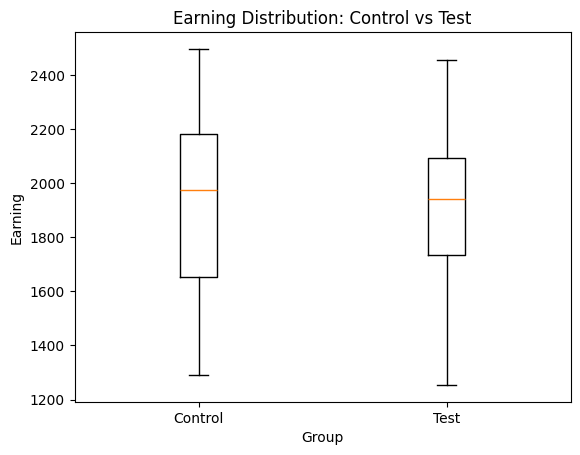

In [19]:
import matplotlib.pyplot as plt

# Prepare data
control_data = df[df['group'] == 'Control']['Earning']
test_data = df[df['group'] == 'Test']['Earning']

# Create boxplot
plt.figure()
plt.boxplot([control_data, test_data], labels=['Control', 'Test'])
plt.title("Earning Distribution: Control vs Test")
plt.ylabel("Earning")
plt.xlabel("Group")
plt.show()


In [20]:
import pandas as pd

summary = pd.DataFrame({
    "Metric": [
        "Control Mean Earning",
        "Test Mean Earning",
        "Mean Difference (Test - Control)",
        "T-Statistic",
        "P-Value",
        "Confidence Interval Lower",
        "Confidence Interval Upper",
        "Decision"
    ],
    "Value": [
        control.mean(),
        test.mean(),
        mean_diff,
        t_stat,
        p_value,
        ci_low,
        ci_high,
        "Fail to Reject H0 (No Significant Difference)"
    ]
})

summary.to_csv("ab_test_summary.csv", index=False)

print("ab_test_summary.csv created!")


ab_test_summary.csv created!
